<a href="https://colab.research.google.com/github/grommitt/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/sprintChallenge1/Greg_Shaughn_DS4_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# TODO
#Load the data as a pandas data frame.

!pip install pandas==0.23.4

In [2]:
import pandas as pd
survival_data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
df = pd.read_csv(survival_data_url)
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [3]:
# Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
df.count()

30     305
64     305
1      305
1.1    305
dtype: int64

In [4]:
# Validate that you have no missing values.
df.isnull().sum()

30     0
64     0
1      0
1.1    0
dtype: int64

In [0]:
# Add informative names to the features.
df = pd.read_csv(survival_data_url, header=None, names=['patient_age', 
                                                   'operation_year', 
                                                   '#_positive_axillary_nodes_detected', 
                                                   'patient_survival_status(1=survived_=>5_years--0=died_<5years)'], 
                                                   index_col=False)

In [6]:
# header=None fixed the count
df.count()

patient_age                                                      306
operation_year                                                   306
#_positive_axillary_nodes_detected                               306
patient_survival_status(1=survived_=>5_years--0=died_<5years)    306
dtype: int64

In [7]:
# The survival variable is encoded as 1 for surviving >5 years and 2 for not - 
# change this to be 0 for not surviving and 1 for surviving >5 years 
# (0/1 is a more traditional encoding of binary variables)
df['patient_survival_status(1=survived_=>5_years--0=died_<5years)'].replace(2, 0, inplace=True)
df.head(50)

,patient_age,operation_year,#_positive_axillary_nodes_detected,patient_survival_status(1=survived_=>5_years--0=died_<5years)
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [8]:
#crosstab 1
ct1 = pd.crosstab(df['patient_survival_status(1=survived_=>5_years--0=died_<5years)'],df['patient_age'])
ct1


patient_age,30,31,33,34,35,36,37,38,39,40,...,70,71,72,73,74,75,76,77,78,83
patient_survival_status(1=survived_=>5_years--0=died_<5years),,,,,,,,,,,,,,,,,,,,,
0,0,0,0,2,0,0,0,1,1,0,...,2,0,1,0,1,0,0,0,1,1
1,3,2,2,5,2,2,6,9,5,3,...,5,1,3,2,1,1,1,1,0,0


In [9]:

age_bins = pd.cut(df['patient_age'], 5)
pd.crosstab(df['patient_survival_status(1=survived_=>5_years--0=died_<5years)'], age_bins)

patient_age,"(29.947, 40.6]","(40.6, 51.2]","(51.2, 61.8]","(61.8, 72.4]","(72.4, 83.0]"
patient_survival_status(1=survived_=>5_years--0=died_<5years),,,,,
0,4,31,27,16,3
1,39,68,69,43,6


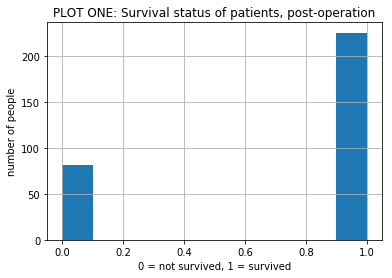

In [10]:
# table 1
import matplotlib.pyplot as plt
plt.ylabel('number of people')
plt.xlabel('0 = not survived, 1 = survived')
plt.title('PLOT ONE: Survival status of patients, post-operation')
df['patient_survival_status(1=survived_=>5_years--0=died_<5years)'].hist()

In [11]:
# crosstab 2
ct2 = pd.crosstab(df['patient_survival_status(1=survived_=>5_years--0=died_<5years)'], df['#_positive_axillary_nodes_detected'])
ct2

#_positive_axillary_nodes_detected,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,28,30,35,46,52
patient_survival_status(1=survived_=>5_years--0=died_<5years),,,,,,,,,,,,,,,,,,,,,
0,19,8,5,7,3,4,3,2,2,4,...,1,1,3,1,0,0,0,1,0,1
1,117,33,15,13,10,2,4,5,5,2,...,0,2,0,0,1,1,1,0,1,0


In [12]:
nodes_bins = pd.cut(df['#_positive_axillary_nodes_detected'], 5)
pd.crosstab(df['patient_survival_status(1=survived_=>5_years--0=died_<5years)'], nodes_bins)

#_positive_axillary_nodes_detected,"(-0.052, 10.4]","(10.4, 20.8]","(20.8, 31.2]","(31.2, 41.6]","(41.6, 52.0]"
patient_survival_status(1=survived_=>5_years--0=died_<5years),,,,,
0,58,15,6,1,1
1,208,11,5,0,1


In [37]:
df['#_positive_axillary_nodes_detected'].describe()

count    306.000000
mean       4.026144
std        7.189654
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: #_positive_axillary_nodes_detected, dtype: float64

In [43]:
df['#_positive_axillary_nodes_detected'].value_counts()

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: #_positive_axillary_nodes_detected, dtype: int64

In [45]:
# 225 patients survive, 81 die // 64% survival rate
df['patient_survival_status(1=survived_=>5_years--0=died_<5years)'].value_counts()

1    225
0     81
Name: patient_survival_status(1=survived_=>5_years--0=died_<5years), dtype: int64

In [47]:
81/225

0.36

In [46]:
# 44% percent of people do not have positive axillary nodes detected
136/306

0.4444444444444444

Text(0.5, 1.0, 'PLOT TWO: survival rate of finding of positive axillary nodes in patients')

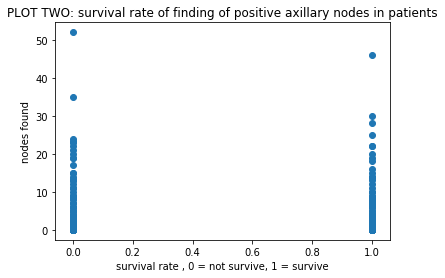

In [13]:
# table 2
plt.scatter(df['patient_survival_status(1=survived_=>5_years--0=died_<5years)'], df['#_positive_axillary_nodes_detected'])
plt.xlabel('survival rate , 0 = not survive, 1 = survive')
plt.ylabel('nodes found')
plt.title('PLOT TWO: survival rate of finding of positive axillary nodes in patients')

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

What is at least one feature that looks to have a positive relationship with survival? 

**Survival has a positive relationship with the absence of positive axillary nodes. There is an increase in survival**

What is at least one feature that looks to have a negative relationship with survival? 

**Patient age has a negative relationship with survival. When the survival rate is the highest(~91%), the age of the patients are the least(between the ages of 29 and 40 years of age). The survival rate is the lowest(~67%) when the age of the patients are the highest(between the ages of 72 and 83 years of age).**

How are those two features related with each other, and what might that mean?


**Positive axillary nodes and death(or survival) are related, so that means positive axillary node findings are bad. This conclusion makes sense because positive axillary nodes are lymph nodes where cancer has spread.**